# Customer Segmentation – Data Preparation & Feature Engineering

This notebook covers the data preparation phase for customer segmentation using the Online Retail dataset.

#### Steps Covered:
1. Data loading and inspection
2. Handling missing values and data inconsistencies
3. Cleaning and filtering transactions
4. Feature engineering (Recency, Frequency, Monetary)
5. Preparing dataset for clustering

This notebook is part of the capstone project for customer segmentation using machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_excel(r"C:\Users\nicku\Downloads\online+retail\Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.duplicated().sum()

5268

In [8]:
df.shape

(541909, 8)

#### The initial exploration of the dataset reveals a realistic transactional dataset with missing values, outliers, and inconsistent entries. The next step is to clean the data by handling missing values, correcting invalid records, and preparing the dataset for modeling.

In [9]:
df_clean = df.copy()

In [10]:
df_clean.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###### Handling missing CustomerID 
###### Rows without customer IDs cannot be linked to any customer, hence removing these rows.

In [11]:
df_clean = df_clean[~df_clean['CustomerID'].isna()]

###### Handling missing description
###### These are product descriptions and do not affect numerical analysis, hence filling these with value as "Unknown"

In [12]:
df_clean['Description'] = df_clean['Description'].fillna('Unknown')

###### Negative quantities (Quantity < 0) represent product returns, hence temporarily excluding them during basic cleaning only to stabilize the dataset.

In [13]:
returns_df = df[df['Quantity'] < 0]
df_clean = df_clean[df_clean['Quantity'] > 0]

In [14]:
returns_df.shape

(10624, 8)

In [15]:
df_clean.shape

(397924, 8)

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [17]:
df_clean.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [19]:
df_clean = df_clean[df_clean['UnitPrice'] > 0]

In [20]:
df_clean.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


#### Creating new features based on existing ones

In [21]:
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [22]:
r_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

In [23]:
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (r_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

In [24]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [25]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [26]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


In [27]:
# Calculating Average Order Value to distinguish high-ticket buyers from frequent low-spend buyers. 
rfm['Avg_Order_Value'] = rfm['Monetary'] / rfm['Frequency']

In [28]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Avg_Order_Value
0,12346.0,326,1,77183.60,77183.600000
1,12347.0,2,7,4310.00,615.714286
2,12348.0,75,4,1797.24,449.310000
3,12349.0,19,1,1757.55,1757.550000
4,12350.0,310,1,334.40,334.400000


In [29]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,Avg_Order_Value
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460,419.166289
std,1721.808492,100.014169,7.697998,8989.230441,1796.537944
min,12346.000000,1.000000,1.000000,3.750000,3.450000
25%,13813.250000,18.000000,1.000000,307.415000,178.625000
50%,15299.500000,51.000000,2.000000,674.485000,293.900000
75%,16778.750000,142.000000,5.000000,1661.740000,430.113750
max,18287.000000,374.000000,209.000000,280206.020000,84236.250000


# K-Means Clustering

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
features = rfm[['Recency', 'Frequency', 'Monetary', 'Avg_Order_Value']]

In [32]:
scaler = StandardScaler()

In [33]:
scaled_features = scaler.fit_transform(features)

###### Normalized numeric matrix is ready for clustering

### Find Optimal Number of Clusters (Elbow Method)

I used the Elbow Method because it visually and intuitively identifies the optimal number of customer segments by balancing model simplicity and clustering quality.

In [34]:
from sklearn.cluster import KMeans

In [37]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

#### Ploting Elbow Curve

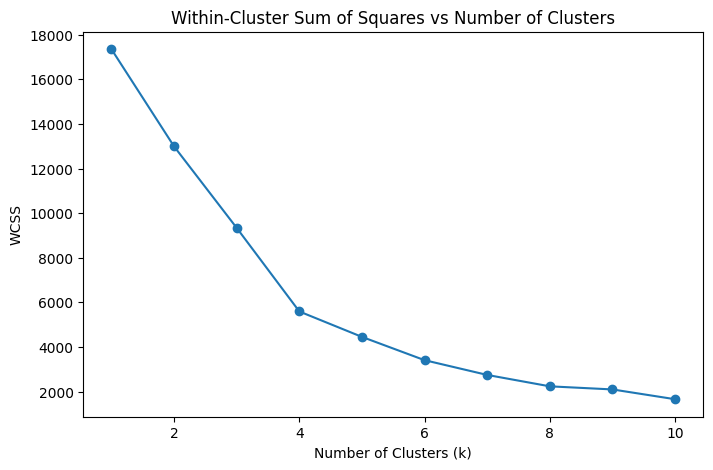

In [38]:
plt.figure(figsize = (8,5))
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares vs Number of Clusters')
plt.show()

### Looking at the above curve selected 4 clusters because the elbow plot showed a sharp decrease in WCSS up to k=4, after which the improvement flattened.

In [39]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

In [42]:
# Clusters were sorted based on average monetary value to identify high-value customer segments.
rfm.groupby('Cluster').mean().sort_values(by=['Monetary', 'Frequency', 'Recency'],ascending=[False, False, True])

,CustomerID,Recency,Frequency,Monetary,Avg_Order_Value
Cluster,,,,,
1,14396.000000,163.500000,1.500000,122828.050000,80709.925000
3,15178.826087,6.304348,73.130435,84505.353478,1622.094617
0,15284.554729,41.231938,4.690233,1907.467213,391.885957
2,15351.632353,246.303309,1.581801,524.399734,327.006549


# Visualizing the Clusters

##### Want cluster info available for every transaction that's why merging DF_Clean with RFM. This allowed us to analyze purchasing behavior, spending patterns, and recency at the segment level. The cluster label acts as a categorical feature representing customer segments.

In [57]:
df_clean = df_clean.merge(rfm[['CustomerID', 'Recency', 'Monetary', 'Cluster', 'Frequency', 'Avg_Order_Value']], on='CustomerID', how='left')

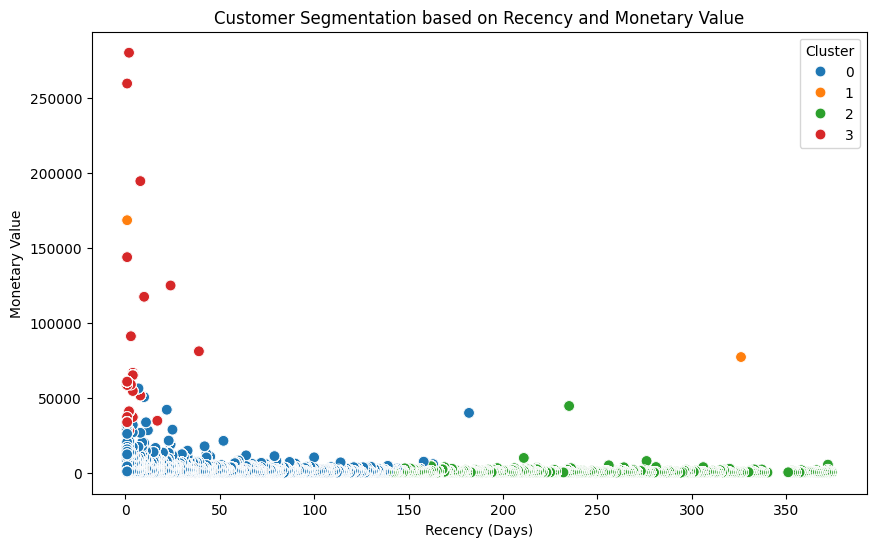

In [49]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Recency', y= 'Monetary', hue = 'Cluster_y', data = df_clean, palette = 'tab10', s = 60)
plt.title('Customer Segmentation based on Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

###### The scatter plot reveals four distinct customer segments, ranging from high-value frequent buyers with recent activity to low-value, inactive customers, clearly showing behavioral separation across recency and spending patterns.

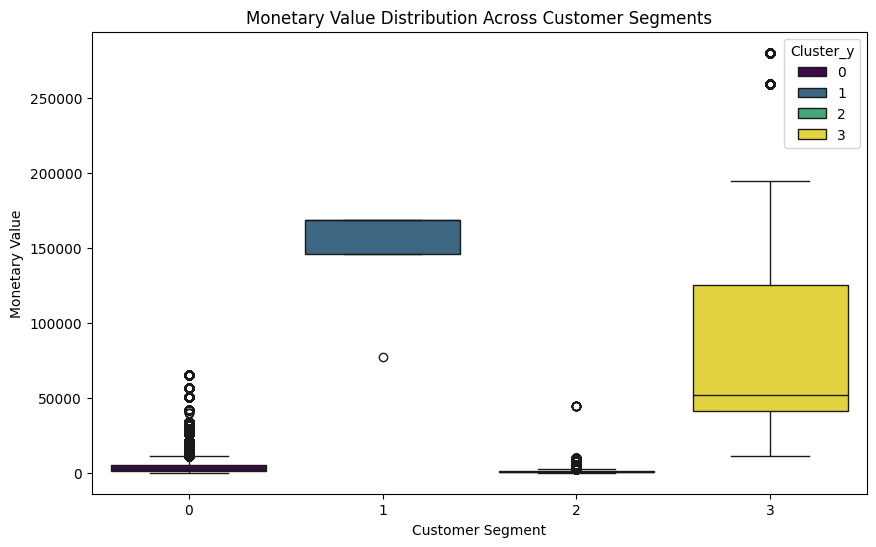

In [54]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Cluster_y', y = 'Monetary', hue = 'Cluster_y', data = df_clean, palette = 'viridis')
plt.title('Monetary Value Distribution Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Monetary Value')
plt.show()

###### The box plot highlights significant variation in spending behavior across clusters, with one segment contributing disproportionately high revenue while others show progressively lower and more consistent spending levels.

# Creating Cluster Summary Table

In [60]:
cluster_summary = df_clean.groupby('Cluster_y').agg({'Recency_y': 'mean',
        'Frequency': 'mean',
       'Monetary_y': 'mean', 
       'Avg_Order_Value': 'mean'}).round(2)

cluster_summary

,Recency_y,Frequency,Monetary_y,Avg_Order_Value
Cluster_y,,,,
0,27.00,9.42,4965.17,514.34
1,82.25,1.75,145650.28,82473.09
2,232.86,2.54,933.64,421.21
3,3.21,119.64,81369.74,1028.27


In [ ]:
# Giving names to cluster on the basis of the interpretaion done above by adding new column as Customer Segment

In [61]:
cluster_names = {
    0: 'Loyal Customers',
    1: 'High-Value Occasional Buyers',
    2: 'At-Risk Customers',
    3: 'Champions'
}

df_clean['Customer_Segment'] = df_clean['Cluster_y'].map(cluster_names)